# 📘 Stock Price Prediction (Short-Term)

## 🧩 Problem Statement:
Use historical stock data of Apple Inc. (AAPL) to predict the next day's closing price. Input features include Open, High, Low, and Volume.

## 🎯 Goal:
* Build a Linear Regression model to forecast the next Close price.
* Evaluate the model using R² Score and RMSE, and visualize actual vs predicted prices.

---

/tmp/ipython-input-1-1846724369.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2022-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


First few rows of the data:
Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2022-01-03  178.645630  179.499559  174.425125  174.542902  104487900
2022-01-04  176.378357  179.558473  175.809076  179.254206   99310400
2022-01-05  171.686707  176.839663  171.411883  176.290017   94537600
2022-01-06  168.820663  172.059668  168.467317  169.507721   96904000
2022-01-07  168.987518  170.921105  167.868591  169.694211   86709100
R² Score: 0.9291534523782777
RMSE: 3.7676115554564342


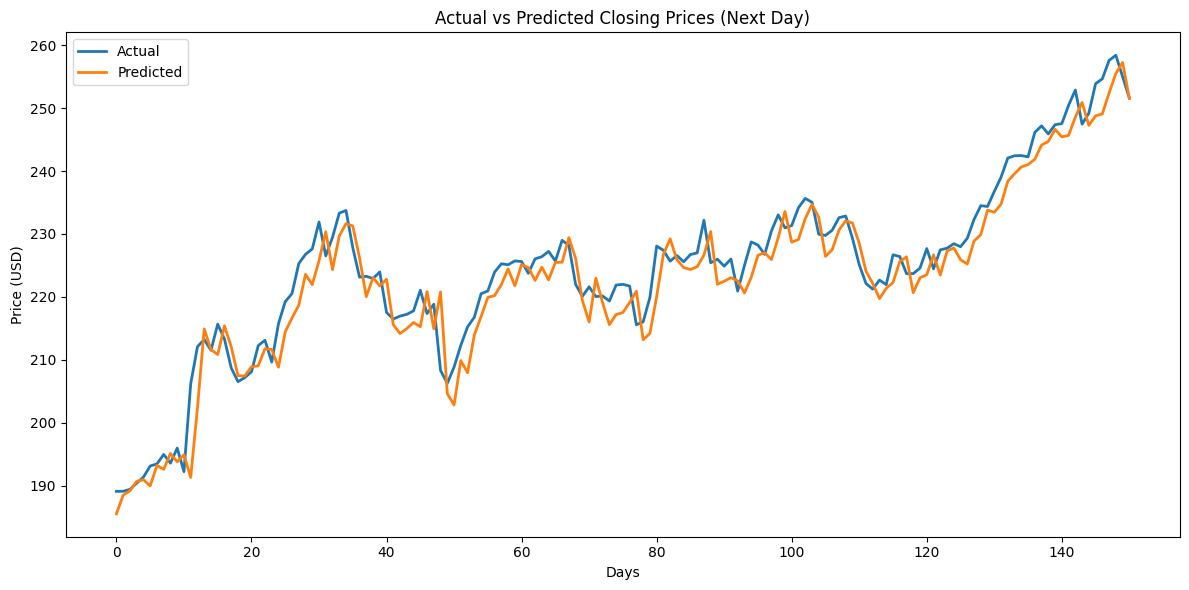

In [1]:
# Install required libraries (run once in Google Colab)
!pip install yfinance scikit-learn matplotlib seaborn
# Import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Download Apple stock data from Yahoo Finance
data = yf.download('AAPL', start='2022-01-01', end='2024-12-31')
# 🧾 Display first few rows of the dataset
print("First few rows of the data:")
print(data.head())
# Create DataFrame with selected features
df = data[['Open', 'High', 'Low', 'Volume', 'Close']].copy()

# Target: Next day's Close price
df['Next_Close'] = df['Close'].shift(-1)

# Drop last row (NaN in Next_Close)
df.dropna(inplace=True)

# Define Features and target
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Next_Close']
# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
# Calculate RMSE and R² Score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("R² Score:", r2)
print("RMSE:", rmse)
# Display results
# Plot actual vs. predicted next-day closing prices
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(y_pred, label='Predicted', linewidth=2)
plt.title('Actual vs Predicted Closing Prices (Next Day)')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.show()
